### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
data = pd.read_excel(url)

# Inspect the dataset
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Inspect the dataset
data.info()  # Optional: Understand the structure of the data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [26]:
# Step 2: Top-Selling Products
top_products = data.groupby('KEL')['QTY'].sum().sort_values(ascending=False).head(10)
top_products_table = top_products.reset_index()
top_products_table.columns = ['Product', 'Quantity Sold']

# Output Outcome: Display top-selling products table
top_products_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product,Quantity Sold
0,MIE,40367.0
1,SUSU KT,34392.0
2,SUSU,30108.0
3,SABUN.M,18827.0
4,PAMPERS,18538.0
5,SNACK,16815.0
6,MINUMAN,16601.0
7,BISCPAK,14648.0
8,AIR.M,12717.0
9,DETERJN,12106.0


In [30]:
# Step 3: Revenue by Product
product_revenue = data.groupby('KEL')['JLH_TRANS'].sum().sort_values(ascending=False).head(10)
product_revenue_table = product_revenue.reset_index()
product_revenue_table.columns = ['Product', 'Total Revenue']

# Output Outcome: Display product revenue table
product_revenue_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product,Total Revenue
0,SUSU KT,2.471473e+09
1,SUSU KL,2.065387e+09
2,PAMPERS,1.089250e+09
3,DETERJN,1.625927e+08
4,SHAMPOO,1.250517e+08
5,MINYAK,1.148140e+08
6,MIE,1.018491e+08
7,SUSU,1.004835e+08
8,BERAS,8.891517e+07
9,MINUMAN,7.861694e+07


In [31]:
# Step 4: Daily Sales Trends
data['TGL_TRANS'] = pd.to_datetime(data['TGL_TRANS'])  # Ensure that the transaction date is in datetime format
data['Day'] = data['TGL_TRANS'].dt.day  # Extract the day from the transaction date

# Group by day to get total sales
daily_sales = data.groupby('Day')['JLH_TRANS'].sum()

# Output Outcome: Display daily sales trends table
daily_sales_table = daily_sales.reset_index()
daily_sales_table.columns = ['Day of January', 'Total Revenue']
daily_sales_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Day of January,Total Revenue
0,1.0,1.776406e+08
1,2.0,4.953664e+08
2,3.0,3.372301e+08
3,4.0,2.926391e+08
4,5.0,4.117160e+08
5,6.0,2.760881e+08
6,7.0,1.938357e+08
7,8.0,1.783472e+08
8,9.0,2.504721e+08
9,10.0,4.638074e+08


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


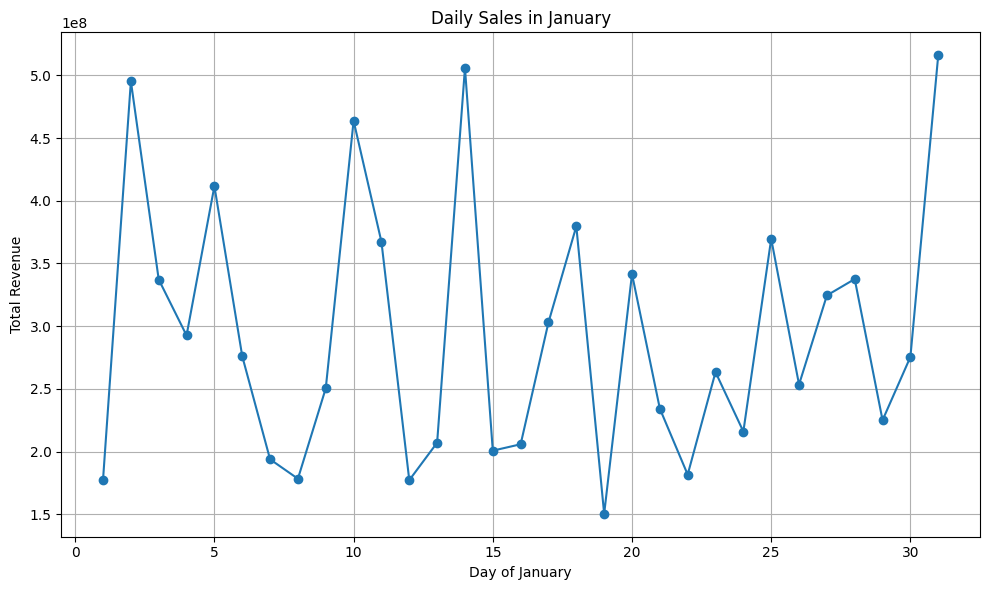

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', marker='o', title='Daily Sales in January')
plt.xlabel('Day of January')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
#Step 5: Market Basket Analysis – Frequent Itemsets

from mlxtend.frequent_patterns import apriori

# Step 5: Prepare Data for Market Basket Analysis
basket = data.groupby(['NO_BKT', 'KEL'])['QTY'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori Algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Output Outcome: Display frequent itemsets table
frequent_itemsets_table = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-5350fb86bd00>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
68,0.166503,(SUSU KT)
44,0.139718,(PAMPERS)
35,0.091888,(MINUMAN)
55,0.087624,(SABUN.M)
15,0.083607,(DETERJN)
...,...,...
162,0.010222,"(SABUN.M, PAMPERS, SHAMPOO)"
115,0.010222,"(MIE, SUSU)"
158,0.010195,"(SABUN.M, PAMPERS, P GIGI)"
32,0.010195,(MARINA)


In [34]:
from mlxtend.frequent_patterns import association_rules

# Step 6: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Output Outcome: Display association rules table
rules_table = rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_table



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
88,(OBATPEL),(SABUNCP),0.010386,0.354809,10.632053
89,(SABUNCP),(OBATPEL),0.010386,0.311220,10.632053
172,(P GIGI),"(SIKAT G, SABUN.M)",0.010277,0.134815,9.431403
169,"(SIKAT G, SABUN.M)",(P GIGI),0.010277,0.718929,9.431403
175,"(SIKAT G, SHAMPOO)",(P GIGI),0.010277,0.689908,9.050686
...,...,...,...,...,...
15,(BISCPAK),(SUSU KT),0.015552,0.244521,1.468570
75,(MIE),(SUSU KT),0.018531,0.234927,1.410952
74,(SUSU KT),(MIE),0.018531,0.111293,1.410952
84,(SUSU KT),(MINUMAN),0.018613,0.111786,1.216545


In [35]:
# Step 7: Placement Ideas
placement_ideas = []
for _, rule in rules_table.iterrows():
    placement_ideas.append(f"Place {', '.join(rule['antecedents'])} near {', '.join(rule['consequents'])}.")
placement_ideas_table = pd.DataFrame({'Placement Suggestion': placement_ideas})

# Output Outcome: Display placement suggestions table
placement_ideas_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Placement Suggestion
0,Place OBATPEL near SABUNCP.
1,Place SABUNCP near OBATPEL.
2,"Place P GIGI near SIKAT G, SABUN.M."
3,"Place SIKAT G, SABUN.M near P GIGI."
4,"Place SIKAT G, SHAMPOO near P GIGI."
...,...
181,Place BISCPAK near SUSU KT.
182,Place MIE near SUSU KT.
183,Place SUSU KT near MIE.
184,Place SUSU KT near MINUMAN.


## Summary of the Supermarket Sales **Analysis**

This analysis was conducted to provide actionable insights for improving the supermarket layout and boosting sales in January. The following key insights were derived from the data:

1. Top-Selling Products
The analysis identified the top 10 products by quantity sold. This highlights which products are popular among customers and could be placed in prime locations for better visibility.

Key Insight: The top-selling products should be prominently displayed to encourage more purchases.
2. Revenue by Product
Revenue analysis revealed the top 10 products generating the most revenue. This helps understand not just quantity sold, but also the profitability of each product.

Key Insight: High-revenue products should be positioned near checkout counters or high-traffic areas to maximize exposure and sales.
3. Daily Sales Trends
The daily revenue was analyzed to understand sales patterns throughout January. This showed fluctuations or consistent sales, helping identify busy days.

Key Insight: Sales patterns can guide staffing decisions and promotional offers to boost sales on low-traffic days.
4. Frequent Itemsets (Market Basket Analysis)
Frequent itemsets were identified, showing which products are commonly bought together. For example, if customers frequently buy "Shampoo" and "Soap" together, this indicates a natural pairing.

Key Insight: Products frequently bought together should be placed near each other in-store to encourage impulse buying and cross-selling.
5. Association Rules
Association rules were generated to understand relationships between products. This provided specific recommendations for which items should be grouped together in the store.

Key Insight: Strong association rules like "Shampoo is bought with Soap" can guide product placement strategies to increase cross-sell opportunities.

6. Placement Ideas for Store Layout
Based on market basket analysis and association rules, actionable layout suggestions were provided. For example, products that are frequently bought together, such as snacks and beverages, should be placed closer to each other.

Key Insight: Optimizing product placement based on customer buying behavior can improve the shopping experience, increase cross-selling opportunities, and drive overall sales.

Recommendations for Store Layout
Prime Locations for Best Sellers: Ensure that the top-selling products are placed in high-traffic areas of the store.

Complementary Products: Based on frequent itemsets and association rules, place products that are often bought together (e.g., Shampoo with Soap, Snacks with Beverages) close to each other.

Traffic-based Placement: Use the daily sales trends to determine which sections need more attention on specific days. Adjust product placement based on customer traffic patterns.